In [1]:
### Libraries necessary to run this IPython Notebook

!pip install folium
!pip install geocoder
!pip install tqdm

#### Load libraries and set options

In [2]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import folium
import geocoder
from tqdm import tqdm
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


## 1. Introduction to Geocoding
Geocoding is the process of transforming a description of a location to a spatial location on the surface of the earth. 

### 1.1 Geocoder
There are several geocoding libraries and services available. In this notebook will demonstrate the use of the [Geocoder](https://pypi.python.org/pypi/geocoder/) Python library, using [Google Maps](https://maps.google.com) as provider.

We start by geocoding a single city and country combination. You can change the values of the city if you wish.

In [3]:
# Let's geocode a city in the format of the data set that we have available
g = geocoder.google('Currais Novos, Brazil')

# Print the lattitude and longitude for the city
g.latlng

[-6.255135399999999, -36.5143974]

You can use the same library to find the location based on IP addresses. When executing this on your virtual analysis environment, the location of the server will be returned.

In [4]:
# Find your location based on your IP address
mylocation = geocoder.ip('me')

# print your location
mylocation.latlng

[-5.8002, -35.2107]

### 1.2 Input data: Student location

We have extracted an earlier snapshot of the current student group, allocated a new id and included industry, country and city. The intention here is to show you what can be achieved with minimal input. 

#### 1.2.1 Load the data

In [5]:
# Load student location data and display the header
df = pd.read_csv('students_raw.csv')
df.head(10)

,id,industry,country,city
0,10001,Agriculture,United States,Davis
1,10002,Arts & Education,Australia,Perth
2,10003,Arts & Education,Austria,Lieboch
3,10004,Arts & Education,Brazil,São Paulo
4,10005,Arts & Education,Canada,Georgetown
5,10006,Arts & Education,Canada,Hamilton
6,10007,Arts & Education,Canada,Milton
7,10008,Arts & Education,Canada,Mississauga
8,10009,Arts & Education,Canada,Regina
9,10010,Arts & Education,Canada,Toronto


Consider the forms and applications that you complete regularly. You may be happy to share your personal information with the company providing you with a product or service, but you will likely not be happy if they start sharing the information publicly. Many people provide this data in social media on public forums and do not necessarily think about the potential consequences. 

One of the techniques to hide sensitive data is to only release aggregated data. The biggest problem with this approach is that you are still able to identify persons in low density areas of the data set. You need to be extremely careful when designing applications that utilize personal data to ensure that you do not breach the trust of the users who supplied you with their data.

We have removed names, surnames, telephone numbers, and email addresses, but many of you would still be able to provide an accurate guess about the random id allocated to you in dataset, df in 1.2.1, based on the examples below.


#### 1.2.2 Prepare the data

In [6]:
# Step 1: Group the data to hide the user id
df1 = pd.DataFrame(df.groupby(['country', 'city', 'industry'])['id'].count()).reset_index()
df1 = df1.rename(columns = {'id':'student_count'})
df1.head(10)

,country,city,industry,student_count
0,Australia,Adelaide,Other or Unknown,1
1,Australia,Bronte,Other or Unknown,1
2,Australia,Buddina,ICT,1
3,Australia,Carlingford,ICT,1
4,Australia,Glen Waverley,ICT,1
5,Australia,Haberfield,ICT,1
6,Australia,Kellyville,Other or Unknown,1
7,Australia,Kogarah Bay,Other or Unknown,1
8,Australia,Logan,Other or Unknown,1
9,Australia,Manly,Other or Unknown,1


#### 1.2.3 Retrieve data for a specific city

In [7]:
# Return all rows for New York
df1.loc[df1['country'] == 'Brazil']

,country,city,industry,student_count
29,Brazil,Brasilia,Public Sector,1
30,Brazil,Juiz De Fora,Health,1
31,Brazil,Natal,Engineering,1
32,Brazil,Niteroi,Media & Marketing,1
33,Brazil,Rio De Janeiro,ICT,1
34,Brazil,Rio De Janeiro,Media & Marketing,2
35,Brazil,Rio De Janeiro,Other or Unknown,1
36,Brazil,Sao Paulo,Finance & Insurance,2
37,Brazil,Sao Paulo,ICT,2
38,Brazil,Sao Paulo,Mining,1


#### 1.2.4 Plot students per country

In [ ]:
# Plot the count of students per country
country_counts = df1.groupby(['country'])['student_count'].sum()
country_counts.plot(kind='bar')

#### 1.2.5 Plot students per industry

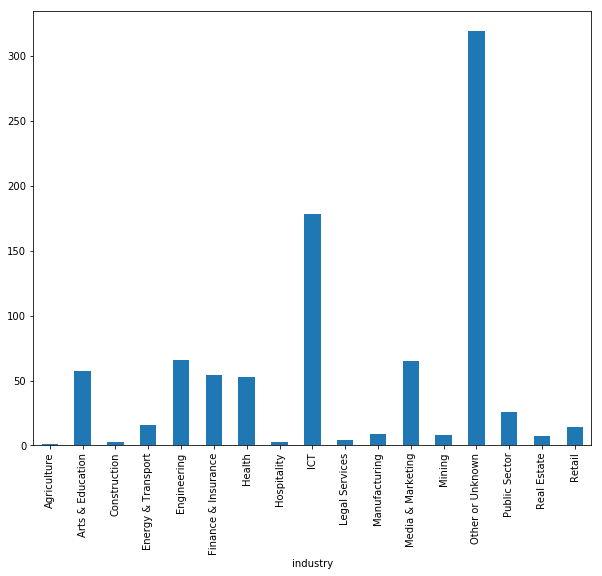

In [9]:
# Plot the count of students per industry
industry_counts = df1.groupby(['industry'])['student_count'].sum()
industry_counts.plot(kind='bar')

#### 1.2.7 Prepare the dataframe for geocoding

In [10]:
# We tested the geocoder library with town and country as input. Let's create a new column in our dataframe that contains these values.
df1['geocode_input'] = df1['city'] + ', ' + df1['country']

# We also create two additional columns for lattitude and longitude.
df1['lat'], df1['long'] = [0, 0]

# Display the head of the updated dataframe.
df1.head()

,country,city,industry,student_count,geocode_input,lat,long
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",0,0
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",0,0
2,Australia,Buddina,ICT,1,"Buddina, Australia",0,0
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",0,0
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",0,0


### 1.3 Geocoding the data

Next, you will geocode cities in the student registrations list in order to display the locations on a map.

This cell will run through a loop and geocode each of the city and country combinations provided as input. This process may take up to 5 minutes. The response is influenced by the target server capacity.

We can use this opportunity to demonstrate how you can save intermediary results as an output file, which you can load when resuming your analysis at a later stage without having to redo all the processing.


In [11]:
# Now we use Geocoder in a loop to gecode the cities and update our dataframe
# Wait until the In{*} indicator on the lefthand side changes to a number before proceeding

for i in tqdm(range(len(df1))):
    g = geocoder.google(df1.loc[i,'geocode_input'])
    df1.ix[i,'lat'] = g.lat
    df1.ix[i,'long'] = g.lng
print('Geocoding complete!')

100%|████████████████████████████████████████████████████████████████████████████████| 690/690 [12:44<00:00,  1.14s/it]


Geocoding complete!


In [12]:
# Let's look at the dataframe again to see the populated values for latitude and longitude.
df1.head()

,country,city,industry,student_count,geocode_input,lat,long
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",-34.928499,138.600746
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",-33.905320,151.260690
2,Australia,Buddina,ICT,1,"Buddina, Australia",-26.690000,153.134000
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",-33.777000,151.048000
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",-37.885652,145.165179


### 1.4 Saving and retrieving your resultset to CSV
In some cases you would want to save result sets. You can utilise this technique to store copies of intermediary results where you do not wish to perform the calculations again when resuming your analysis or to output the result to be shared or utilized in other applications. 

In [13]:
# To save the output to a file you can use the command below and replace "filename_export" with a name of your choice.
df1.to_csv('students_export.csv')

In [14]:
# To load the file you just generated, you can replace the filename below with the one you entered in the previous cell.
# Create a new Pandas dataframe with the file created in the previous cell.
new_df = pd.read_csv('students_export.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 1: invalid continuation byte

### 1.5 Plotting the geocoded data on a map

You can visit the Folium [documentation](http://folium.readthedocs.io/en/latest/) or browse the [GitHub](https://github.com/python-visualization/folium) repository for further instructions and examples.

Feel free to change the map and try to visualize the count of students per country or the count of students per industry per country.

In [16]:
# Set map center and zoom level
mapc = [0, 30]
zoom = 2

# Create map object
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)
# Plot each of the locations that we geocoded
for j in tqdm(range(len(df1))):
    folium.Marker([df1.ix[j,'lat'], df1.ix[j,'long']],
        icon=folium.Icon(color='green',icon='info-sign')
        ).add_to(map_osm)
# Show the map
map_osm

100%|███████████████████████████████████████████████████████████████████████████████| 690/690 [00:06<00:00, 104.41it/s]


In [17]:
from folium.plugins import HeatMap

# Set map center and zoom level
mapc = [0, 30]
zoom = 2

coordinates = []

for i in range(len(df1)):
    # eliminate items with'nan' element
    if all(~np.isnan([df1.ix[i,'lat'], df1.ix[i,'long'], df1.ix[i,'student_count']])):
        coordinates.append([df1.ix[i,'lat'], df1.ix[i,'long'], df1.ix[i,'student_count']])

# Create map object
m = folium.Map(location=mapc,
                    zoom_start=zoom)

HeatMap(coordinates).add_to(m)

m
